In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 10.1 MB/s eta 0:00:00


In [ ]:
import os
data_config_path = '/content/drive/MyDrive/CyberFinal/carplate.yaml'
assert os.path.exists(data_config_path)
data_config_path

'/content/drive/MyDrive/CyberFinal/carplate.yaml'

# Visualize one image to check whether the yolo format bbox is accurate

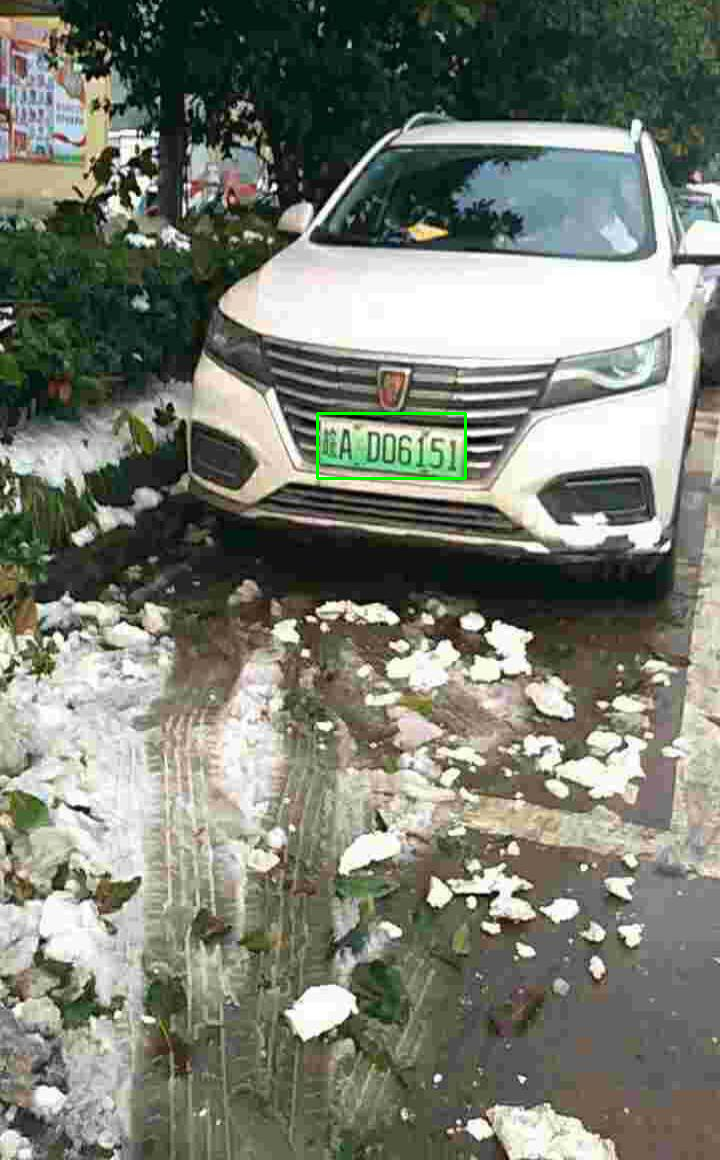

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Used to display images in Colab

# Load the image
image_path = '/content/drive/MyDrive/Carplate/images/val/00001.jpg'
image = cv2.imread(image_path)
height, width, _ = image.shape

# Annotation file path
annotation_path = '/content/drive/MyDrive/Carplate/labels/val/00001.txt'

# Read and process annotations
with open(annotation_path, 'r') as file:
    annotations = file.readlines()

for annotation in annotations:
    parts = annotation.strip().split()
    object_class, x_center, y_center, w, h = parts
    object_class, x_center, y_center, w, h = int(object_class), float(x_center), float(y_center), float(w), float(h)

    # Convert normalized positions back to pixel positions
    x_center, y_center, w, h = x_center * width, y_center * height, w * width, h * height

    # Calculate the bounding box's top left corner
    x_min, y_min = int(x_center - w / 2), int(y_center - h / 2)

    # Assign a color based on the object class (adjust as needed)
    color = (0, 255, 0)  # Green for demonstration

    # Draw the bounding box
    cv2.rectangle(image, (x_min, y_min), (x_min + int(w), y_min + int(h)), color, 2)

# Display the image in Colab
cv2_imshow(image)


# Modify both images and labels name into pure number (We encounter some problems training, when the file name included special charactors)

In [ ]:
# import os

# def rename_files(images_dir, labels_dir):
#     # Get list of images and labels
#     image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')])
#     label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])

#     # Ensuring the number of related files are the same
#     assert len(image_files) == len(label_files), "number of images and labels are not matched"

#     # Rename the files
#     for idx, (image_file, label_file) in enumerate(zip(image_files, label_files), start=1):
#         # Define new files name
#         new_name = f"{idx:05d}"

#         # Define path of new files
#         new_image_path = os.path.join(images_dir, f"{new_name}{os.path.splitext(image_file)[1]}")
#         new_label_path = os.path.join(labels_dir, f"{new_name}.txt")

#
#         os.rename(os.path.join(images_dir, image_file), new_image_path)
#         os.rename(os.path.join(labels_dir, label_file), new_label_path)

#         print(f"Has been renamed：{image_file} -> {new_image_path}")
#         print(f"Has been renamed：{label_file} -> {new_label_path}")

#

# # Rename training dataset
# # rename_files(images_dir, labels_dir)


In [ ]:
# Rename training sets
# images_dir_test = '/content/drive/MyDrive/CyberFinal/image/train'
# labels_dir_test = '/content/drive/MyDrive/CyberFinal/labels/train'

# # # Rename testing dataset
# rename_files(images_dir_test, labels_dir_test)


In [ ]:
# Rename testing sets
# images_dir_test = '/content/drive/MyDrive/CyberFinal/image/test'
# labels_dir_test = '/content/drive/MyDrive/CyberFinal/labels/test'

# # # Rename testing dataset
# rename_files(images_dir_test, labels_dir_test)


In [ ]:
# Rename validation sets
# images_dir_test = '/content/drive/MyDrive/CyberFinal/image/val'
# labels_dir_test = '/content/drive/MyDrive/CyberFinal/labels/val'

# # # Rename testing dataset
# rename_files(images_dir_test, labels_dir_test)


# Start training

In [ ]:
# Load a model
model_name = 'yolov8n' # We chose nano because there was a cuda issue with larger yolov8 model e.g. 'yolov8m'

model = YOLO(f"{model_name}.yaml")  # build a new model from scratch
try:
    model = YOLO(f"{model_name}.pt")  # load a pretrained model (recommended for training)
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

100%|██████████| 6.23M/6.23M [00:00<00:00, 126MB/s]


In [ ]:
# Use the model
model.train(
    data = "/content/drive/MyDrive/Carplate/carplate.yaml",
    name = "yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8",
    epochs=200,
    # device='0',  # Use the single available GPU
    plots=True,
    batch = 16,
    # imgsz=img_size,
    optimizer = 'auto',
    lr0= 6e-4,
    momentum=0.9,
    )  # train the model


Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Carplate/carplate.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Carplate/labels/train.cache... 5769 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5769/5769 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Carplate/labels/val.cache... 1001 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0006' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200       2.5G     0.7134      1.351     0.9071         15        640: 100%|██████████| 361/361 [02:19<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:31<00:00,  1.00it/s]


                   all       1001       1001      0.993      0.992      0.994      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200       2.5G     0.7007     0.6769     0.9011         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.75it/s]

                   all       1001       1001      0.989      0.992      0.994      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.51G     0.7235     0.5527     0.9135         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]


                   all       1001       1001      0.988      0.991      0.994      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.47G     0.7013     0.4864     0.9132         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.09it/s]

                   all       1001       1001      0.992      0.986      0.994      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.47G     0.6651     0.4345     0.9012         18        640: 100%|██████████| 361/361 [00:41<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.22it/s]

                   all       1001       1001      0.997      0.991      0.994      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.46G     0.6417     0.4051     0.8934         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.92it/s]

                   all       1001       1001      0.999      0.995      0.994      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.47G     0.6261     0.3876     0.8908         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.20it/s]

                   all       1001       1001       0.99      0.993      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.47G     0.6187     0.3776     0.8898         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all       1001       1001      0.991      0.974      0.993       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.47G     0.6034     0.3664      0.885         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all       1001       1001      0.993      0.993      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.46G     0.5927     0.3559     0.8822         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.25it/s]

                   all       1001       1001      0.995       0.98      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.47G     0.5807     0.3486     0.8771         22        640: 100%|██████████| 361/361 [00:40<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.27it/s]

                   all       1001       1001      0.991      0.992      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.47G     0.5845     0.3463     0.8794         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.93it/s]

                   all       1001       1001      0.998      0.988      0.994      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.47G     0.5737     0.3387     0.8768         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.31it/s]

                   all       1001       1001      0.985      0.976      0.993      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.46G     0.5676     0.3293     0.8741         17        640: 100%|██████████| 361/361 [00:41<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.16it/s]


                   all       1001       1001      0.999      0.985      0.994      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.47G     0.5667     0.3312     0.8721         11        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.22it/s]

                   all       1001       1001      0.994       0.99      0.994      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.47G     0.5656     0.3259     0.8717         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all       1001       1001       0.99      0.985      0.994      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.47G     0.5573     0.3183      0.875         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.33it/s]

                   all       1001       1001      0.993      0.962      0.987      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.46G      0.563     0.3175     0.8732         14        640: 100%|██████████| 361/361 [00:39<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all       1001       1001      0.999      0.978      0.994      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.47G     0.5523     0.3124     0.8716         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all       1001       1001      0.997      0.977      0.993       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.47G     0.5476     0.3077     0.8713         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.21it/s]

                   all       1001       1001      0.993      0.988      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.47G     0.5512     0.3082     0.8733         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all       1001       1001      0.998      0.988      0.994      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.46G     0.5458     0.3058     0.8727         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.34it/s]

                   all       1001       1001      0.994      0.962      0.989      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.47G     0.5399      0.299     0.8702         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

                   all       1001       1001      0.996      0.995      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.47G     0.5404     0.2991     0.8704         23        640: 100%|██████████| 361/361 [00:40<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.25it/s]

                   all       1001       1001      0.996       0.99      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.47G     0.5386     0.2956     0.8712         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.16it/s]


                   all       1001       1001      0.994      0.987      0.994      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.46G     0.5377     0.2951     0.8678         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]

                   all       1001       1001      0.994       0.99      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.47G     0.5457     0.2979     0.8736         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]

                   all       1001       1001       0.99       0.98      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.47G     0.5353     0.2918     0.8705         10        640: 100%|██████████| 361/361 [00:40<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.07it/s]

                   all       1001       1001      0.995      0.989      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.47G      0.535     0.2892     0.8706         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.88it/s]

                   all       1001       1001      0.985      0.986      0.994      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.46G     0.5323     0.2875     0.8689         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.07it/s]

                   all       1001       1001      0.999      0.987      0.994      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.47G     0.5295      0.285     0.8671         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.30it/s]


                   all       1001       1001      0.989      0.991      0.994      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.47G     0.5231     0.2816     0.8654         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.09it/s]


                   all       1001       1001       0.99      0.965      0.993      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.47G     0.5293      0.283     0.8697         28        640: 100%|██████████| 361/361 [00:41<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all       1001       1001      0.992       0.98      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.46G     0.5229     0.2791     0.8684         22        640: 100%|██████████| 361/361 [00:40<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all       1001       1001      0.995      0.977      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.47G     0.5274     0.2809     0.8701         19        640: 100%|██████████| 361/361 [00:40<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.16it/s]

                   all       1001       1001       0.99      0.963      0.991      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.47G     0.5271     0.2776     0.8662         21        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.37it/s]

                   all       1001       1001      0.995      0.988      0.994      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.47G      0.524     0.2762     0.8675         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.18it/s]


                   all       1001       1001      0.989      0.971      0.993      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.46G     0.5194     0.2736     0.8666         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all       1001       1001      0.995      0.982      0.994      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.47G     0.5243      0.277     0.8671         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.17it/s]

                   all       1001       1001      0.991      0.978      0.993      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.47G     0.5255     0.2777     0.8691         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.30it/s]

                   all       1001       1001      0.991      0.946      0.987      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.47G      0.518     0.2713     0.8648         17        640: 100%|██████████| 361/361 [00:39<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.21it/s]

                   all       1001       1001      0.987      0.918       0.97      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.46G     0.5185     0.2737     0.8681         24        640: 100%|██████████| 361/361 [00:40<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all       1001       1001      0.995      0.964       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.47G     0.5225     0.2763     0.8685         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all       1001       1001      0.996      0.981      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.47G     0.5121     0.2706     0.8634         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]


                   all       1001       1001      0.998      0.981      0.994      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.47G     0.5177     0.2746     0.8642         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.27it/s]

                   all       1001       1001      0.988       0.98      0.994      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.46G     0.5152     0.2668     0.8642         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.08it/s]

                   all       1001       1001      0.995      0.983      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.47G     0.5151     0.2662     0.8629         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.24it/s]

                   all       1001       1001      0.991      0.972      0.989      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.47G     0.5121     0.2656     0.8661         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.27it/s]

                   all       1001       1001      0.999      0.968       0.99      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.47G     0.5128     0.2678     0.8587         18        640: 100%|██████████| 361/361 [00:41<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.91it/s]

                   all       1001       1001      0.994       0.96      0.988      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.46G     0.5165     0.2657     0.8627         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.24it/s]

                   all       1001       1001      0.996      0.964       0.99      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.47G     0.5096      0.262     0.8609         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.07it/s]


                   all       1001       1001      0.995      0.967      0.989      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.47G     0.5092     0.2621     0.8579         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.29it/s]

                   all       1001       1001      0.997      0.972      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.47G     0.5131      0.261     0.8645         10        640: 100%|██████████| 361/361 [00:41<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all       1001       1001      0.992      0.981      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.46G     0.5056     0.2578     0.8614         21        640: 100%|██████████| 361/361 [00:40<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all       1001       1001      0.993      0.974      0.992      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.47G     0.5104       0.26     0.8598         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.87it/s]

                   all       1001       1001      0.991      0.966      0.993      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.47G     0.5141     0.2611     0.8615         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]

                   all       1001       1001      0.995      0.975      0.993      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.47G     0.5087     0.2615      0.859         10        640: 100%|██████████| 361/361 [00:40<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all       1001       1001      0.994       0.95      0.983      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.46G      0.511     0.2574     0.8628         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.32it/s]

                   all       1001       1001      0.993      0.989      0.994      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.47G     0.5089     0.2583     0.8589         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.33it/s]

                   all       1001       1001      0.992      0.987      0.994      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.47G     0.5061     0.2544     0.8658         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.09it/s]

                   all       1001       1001      0.993      0.978      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.47G     0.5009     0.2546     0.8595         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all       1001       1001      0.995      0.957      0.989      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.46G     0.5018     0.2516     0.8586         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all       1001       1001      0.992      0.973      0.993      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.47G     0.5032     0.2542     0.8593         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.07it/s]

                   all       1001       1001      0.988      0.963      0.989       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.47G     0.5028      0.254     0.8551         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]


                   all       1001       1001      0.993      0.983      0.994      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.47G     0.5054     0.2521     0.8602         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all       1001       1001      0.992      0.961      0.986      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.46G     0.5036     0.2526     0.8654         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.24it/s]

                   all       1001       1001      0.998      0.964       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.47G     0.4989     0.2481     0.8606         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.89it/s]

                   all       1001       1001      0.993      0.965       0.99      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.47G     0.5038     0.2505     0.8621         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.38it/s]

                   all       1001       1001      0.998      0.973      0.994      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.47G     0.5025     0.2494     0.8556         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all       1001       1001      0.993      0.964       0.99      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.46G     0.4969     0.2481     0.8573         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.40it/s]

                   all       1001       1001      0.995       0.95      0.985      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.47G      0.504     0.2507     0.8621         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all       1001       1001      0.987      0.964      0.991      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.47G     0.5003     0.2466     0.8592         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.69it/s]

                   all       1001       1001      0.995       0.97      0.992      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.47G     0.4993     0.2465     0.8617         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.09it/s]

                   all       1001       1001      0.998      0.967       0.99       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.46G      0.497     0.2458     0.8591         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.32it/s]

                   all       1001       1001      0.998      0.964      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.47G     0.5012     0.2466     0.8585         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.98it/s]

                   all       1001       1001      0.999      0.971      0.994      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.47G     0.5009     0.2476     0.8579         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.99it/s]

                   all       1001       1001      0.993       0.97      0.991      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.47G      0.496     0.2459     0.8564         26        640: 100%|██████████| 361/361 [00:41<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.20it/s]

                   all       1001       1001      0.996      0.977      0.994      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.46G     0.4965     0.2449     0.8599         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.44it/s]


                   all       1001       1001      0.994      0.974      0.993      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.47G     0.5006      0.246     0.8548         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all       1001       1001      0.995       0.98      0.993       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.47G      0.495     0.2433     0.8523         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.91it/s]


                   all       1001       1001      0.996      0.975      0.991      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.47G     0.4924     0.2439     0.8542         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.29it/s]

                   all       1001       1001      0.991      0.972      0.991      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.46G     0.4999     0.2441     0.8612         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.00it/s]

                   all       1001       1001      0.995      0.976      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.47G     0.4949      0.244     0.8583         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.24it/s]

                   all       1001       1001      0.995      0.977      0.994      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.47G     0.4958     0.2423     0.8597         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.29it/s]

                   all       1001       1001      0.998      0.977      0.993      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.47G     0.4981     0.2414     0.8536         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.88it/s]

                   all       1001       1001      0.996      0.981      0.994      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.46G     0.4882     0.2373     0.8588         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.27it/s]

                   all       1001       1001      0.997      0.974      0.991      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.47G     0.4917     0.2412     0.8578         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all       1001       1001      0.996       0.97       0.99      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.47G     0.4886      0.239      0.855         23        640: 100%|██████████| 361/361 [00:40<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.31it/s]

                   all       1001       1001      0.999      0.961      0.987      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.47G     0.4866     0.2365      0.854         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all       1001       1001      0.996      0.968      0.991      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.46G     0.4903     0.2374     0.8545         21        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all       1001       1001      0.996      0.976      0.991      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.47G     0.4877     0.2401     0.8538         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]

                   all       1001       1001      0.998      0.972      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.47G     0.4895      0.239     0.8495         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.36it/s]


                   all       1001       1001      0.996      0.976      0.991      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.47G      0.491     0.2373     0.8517         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all       1001       1001      0.997      0.978      0.992      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.46G      0.487     0.2368     0.8549         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.23it/s]

                   all       1001       1001      0.996      0.967      0.989      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.47G     0.4857      0.234     0.8578         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all       1001       1001      0.997      0.968      0.989      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.47G      0.487     0.2344     0.8557         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.41it/s]


                   all       1001       1001      0.995      0.959      0.989      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.47G     0.4873     0.2336     0.8503         17        640: 100%|██████████| 361/361 [00:41<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.35it/s]


                   all       1001       1001      0.985      0.975      0.993      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.46G     0.4888      0.235     0.8535         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]


                   all       1001       1001      0.989      0.973       0.99      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.47G     0.4869     0.2342     0.8549         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.37it/s]

                   all       1001       1001      0.991      0.966       0.99      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.47G     0.4857     0.2313     0.8534         22        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]

                   all       1001       1001      0.993      0.978      0.993      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.47G     0.4842     0.2319      0.852         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.21it/s]

                   all       1001       1001      0.991       0.98      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.46G     0.4847     0.2321     0.8551         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.24it/s]

                   all       1001       1001       0.99      0.975      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.47G     0.4817     0.2334     0.8513         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.24it/s]

                   all       1001       1001      0.992      0.975      0.992      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.47G     0.4865     0.2347      0.852         24        640: 100%|██████████| 361/361 [00:40<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.89it/s]

                   all       1001       1001      0.995      0.978      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.47G     0.4835     0.2307     0.8508         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.22it/s]

                   all       1001       1001      0.994      0.975      0.991      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.46G     0.4856     0.2309     0.8495         17        640: 100%|██████████| 361/361 [00:40<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.30it/s]

                   all       1001       1001      0.995      0.971       0.99      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.47G     0.4876     0.2295     0.8484         28        640: 100%|██████████| 361/361 [00:40<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.00it/s]

                   all       1001       1001      0.996      0.972      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.47G     0.4812     0.2313     0.8467         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.37it/s]

                   all       1001       1001      0.997      0.977      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.47G     0.4845     0.2293     0.8482         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.18it/s]

                   all       1001       1001      0.993      0.984      0.994      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.46G     0.4827     0.2298     0.8508         25        640: 100%|██████████| 361/361 [00:40<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.30it/s]

                   all       1001       1001      0.995      0.984      0.994      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.47G     0.4878     0.2317       0.85         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all       1001       1001      0.995      0.979      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.47G     0.4786     0.2273       0.85         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.27it/s]

                   all       1001       1001      0.996      0.981      0.994      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.47G     0.4794     0.2271     0.8513         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.17it/s]

                   all       1001       1001      0.993      0.982      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.46G     0.4811      0.226     0.8532         22        640: 100%|██████████| 361/361 [00:40<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.30it/s]

                   all       1001       1001      0.995       0.98      0.994      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.47G     0.4784     0.2262     0.8567         19        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]

                   all       1001       1001      0.997      0.975      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.47G     0.4843     0.2279     0.8609         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.97it/s]

                   all       1001       1001      0.997      0.972      0.992      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.47G     0.4778     0.2269     0.8624         13        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.94it/s]

                   all       1001       1001      0.996      0.974      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.46G     0.4771     0.2257     0.8636         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.26it/s]

                   all       1001       1001      0.995      0.976      0.994      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.47G     0.4771     0.2266     0.8622         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.97it/s]

                   all       1001       1001      0.994      0.977      0.994      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.47G     0.4778     0.2299     0.8666         11        640: 100%|██████████| 361/361 [00:40<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]


                   all       1001       1001      0.992       0.98      0.994      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.47G     0.4761      0.225     0.8615         18        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all       1001       1001      0.998      0.975      0.994      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.46G     0.4741     0.2245     0.8593         18        640: 100%|██████████| 361/361 [00:41<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.18it/s]

                   all       1001       1001      0.996      0.978      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.47G      0.478     0.2251     0.8626         12        640: 100%|██████████| 361/361 [00:40<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.00it/s]

                   all       1001       1001      0.996       0.98      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.47G     0.4779     0.2224     0.8615         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all       1001       1001      0.993      0.981      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.47G     0.4749     0.2212     0.8562         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all       1001       1001      0.994      0.979      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.46G     0.4757     0.2211     0.8517         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.33it/s]

                   all       1001       1001      0.995      0.978      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.47G     0.4762     0.2215     0.8522         14        640: 100%|██████████| 361/361 [00:41<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all       1001       1001      0.994      0.978      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.47G     0.4743     0.2209     0.8534         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.37it/s]

                   all       1001       1001      0.995      0.974      0.994      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.47G     0.4738     0.2199     0.8485         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.93it/s]

                   all       1001       1001      0.997      0.971      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.46G     0.4719      0.219      0.849          8        640: 100%|██████████| 361/361 [00:40<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all       1001       1001      0.997      0.971      0.991      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.47G     0.4715     0.2174     0.8526         14        640: 100%|██████████| 361/361 [00:40<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.09it/s]

                   all       1001       1001      0.997      0.971      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.47G     0.4658     0.2168      0.851         26        640: 100%|██████████| 361/361 [00:40<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all       1001       1001      0.997       0.97      0.991      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.47G     0.4705     0.2173     0.8534         20        640: 100%|██████████| 361/361 [00:40<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]


                   all       1001       1001      0.998      0.967       0.99      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.46G      0.472     0.2182     0.8561         15        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.21it/s]

                   all       1001       1001      0.999      0.965       0.99      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.47G     0.4723     0.2156      0.857         16        640: 100%|██████████| 361/361 [00:40<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.26it/s]

                   all       1001       1001      0.999      0.964      0.989       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.47G     0.4696     0.2179     0.8524         17        640: 100%|██████████| 361/361 [00:40<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.26it/s]

                   all       1001       1001      0.999      0.964      0.989      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.47G     0.4724     0.2193     0.8475         22        640: 100%|██████████| 361/361 [00:40<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.28it/s]

                   all       1001       1001      0.998      0.964      0.989      0.859
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 37, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



137 epochs completed in 1.769 hours.
Optimizer stripped from runs/detect/yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8/weights/best.pt, 6.2MB

Validating runs/detect/yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.76it/s]


                   all       1001       1001      0.989      0.971      0.993      0.878
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7977e3d4f010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Export the result to my google drive
import shutil

source_dir = '/content/runs'
target_dir = '/content/drive/MyDrive/Carplate'

# 使用shutil來複制目錄
shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)  # Python 3.8+

'/content/drive/MyDrive/Carplate'

# Crop the detect carplate area and feed to the text recognition part

In [ ]:
import cv2
import os

# Function to read the bounding boxes from YOLO formatted annotation file
def read_yolo_annotations(annot_path, img_width, img_height):
    with open(annot_path, 'r') as file:
        bboxes = []
        for line in file.readlines():
            class_id, x_center, y_center, width, height = map(float, line.split(' '))
            x_min = int((x_center - width / 2) * img_width)
            y_min = int((y_center - height / 2) * img_height)
            x_max = int((x_center + width / 2) * img_width)
            y_max = int((y_center + height / 2) * img_height)
            bboxes.append((x_min, y_min, x_max, y_max))
        return bboxes

# Function to crop the detected area and save as new image
def crop_and_save(bboxes, image, save_dir, image_name):
    for i, (x_min, y_min, x_max, y_max) in enumerate(bboxes):
        crop_img = image[y_min:y_max, x_min:x_max]
        cv2.imwrite(os.path.join(save_dir, f"{image_name}_crop_{i}.jpg"), crop_img)

# Paths
image_dir = '/path/to/images'
annotation_dir = '/path/to/annotations'
save_dir = '/path/to/save/cropped/images'

# Make sure the save directory exists
os.makedirs(save_dir, exist_ok=True)

# Process each image
for image_name in os.listdir(image_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        image_path = os.path.join(image_dir, image_name)
        annot_path = os.path.join(annotation_dir, image_name.rsplit('.', 1)[0] + '.txt')

        # Read image and annotations
        image = cv2.imread(image_path)
        h, w = image.shape[:2]
        bboxes = read_yolo_annotations(annot_path, w, h)

        # Crop and save carplate areas
        crop_and_save(bboxes, image, save_dir, image_name.rsplit('.', 1)[0])


# Using pretrain model to predict unlabel image

In [ ]:
import torch
from pathlib import Path
from PIL import Image
import numpy as np
import cv2

# Load the model
model_path = '/content/drive/MyDrive/Carplate/yolov8m_carplate_1-epochs_optimizer-AdamW_lr-0.0006_batch-8/weights/best.pt'  # Path to your trained model
model = torch.hub.load('ultralytics/yolov8', 'custom', path=model_path)  # Use 'ultralytics/yolov8' for YOLOv8

# Set the model to evaluation mode
model.eval()

# Function to perform prediction on an image
def predict(image_path, model):
    # Load image
    image = Image.open(image_path)
    image = np.array(image)

    # Perform inference
    results = model(image)

    # Parse results
    predictions = results.pred[0].numpy()

    # Draw bounding boxes and labels on the image
    for *box, conf, cls in predictions:
        label = model.names[int(cls)]  # Get the label
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
        cv2.putText(image, label, (int(box[0]), int(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image, predictions

# Path to the new image
new_image_path = '/content/drive/MyDrive/Carplates/predict_image.jpg'  # Replace with your new image path

# Predict and get the modified image
modified_image, preds = predict(new_image_path, model)

# Save image to disk
cv2.imwrite('/content/drive/MyDrive/predicted_images/pred_image.jpg', modified_image)  # Save to disk


